<a id=0></a>
# 4.Categorical Plot

---
### [1.SearbornのデータセットからDataFrameを作成 ](#1)
### [2.欠損値の処理 ](#2)
### [3.欠損した年齢を考えてみる（プロットの例を示す）](#3)
### [4.カテゴリカルプロット](#4)
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

In [2]:
import warnings
warnings.simplefilter('ignore')

---
<a id=1></a>
[Topへ](#0)

---
## 1. SearbornのデータセットからDataFrameを作成

* データセット(Titanic)を読み込む
* データセットの理解と整理、Kaggleの紹介
* 重複カラムの処理
---

データセット(Titanic)を読み込む

In [3]:
# sns.get_dataset_names()に対して
# このような関数はないというエラー、もしくは空のリストがリターンされるかもしれません
# その場合は続くセルのload_datasetもエラーになると思われます
# ダウンロードいただいている"sns_datasets"内のcsvファイルを読み込んで学習を先へお進めください

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:
len(sns.get_dataset_names())

22

In [5]:
df = sns.load_dataset('titanic')

In [6]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
df.shape

(891, 15)

データセットの理解と整理、Kaggleの紹介

<p>
    <a href="https://www.kaggle.com/competitions/titanic/data" target="_blank" rel="noreferrer noopener">
        Kaggle Dataset Titanic のページへ
    </a>
</p>

    survival : Survival	0 = No, 1 = Yes  
    pclass   : Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd  
    sex	  : Sex	  
    age      : Age in years  	
    sibsp    : # of siblings / spouses aboard the Titanic  (兄弟姉妹 / 配偶者)  
    parch    : # of parents / children aboard the Titanic	(親 / 子)  
    fare     : Passenger fare	
    embarked : Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton  
    who      : man or female or child
    class, who, adult_male, deck, embark_town, alive, alone
    ※ 一部変更しています

重複カラムの処理（'alive', 'class', 'adult_male', 'embark_town', 'alone'）

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [9]:
df['survived'].unique(), df['alive'].unique()

(array([0, 1]), array(['no', 'yes'], dtype=object))

In [10]:
df[['survived', 'alive']].value_counts()

survived  alive
0         no       549
1         yes      342
Name: count, dtype: int64

In [11]:
df[['pclass', 'class']].value_counts()

pclass  class 
3       Third     491
1       First     216
2       Second    184
Name: count, dtype: int64

In [12]:
df[['embarked', 'embark_town']].value_counts()

embarked  embark_town
S         Southampton    644
C         Cherbourg      168
Q         Queenstown      77
Name: count, dtype: int64

In [13]:
df[['who', 'adult_male']].value_counts()

who    adult_male
man    True          537
woman  False         271
child  False          83
Name: count, dtype: int64

In [14]:
df[['sex', 'who']].value_counts()

sex     who  
male    man      537
female  woman    271
        child     43
male    child     40
Name: count, dtype: int64

In [15]:
len(df[(df['sex']=='female')&(df['who']=='child')])

43

In [16]:
len(df[(df['sex']=='male')&(df['who']=='child')])

40

In [17]:
df[(df['sibsp']==0)&(df['parch']==0)]['alone'].value_counts()

alone
True    537
Name: count, dtype: int64

In [18]:
df[~((df['sibsp']==0)&(df['parch']==0))]['alone'].value_counts()

alone
False    354
Name: count, dtype: int64

In [20]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

<p style="background-color:#ffd">
    'alive', 'class', 'adult_male', 'embark_town', 'alone' のカラムを削除 
    </p>

In [23]:
df.drop(['alive', 'class', 'adult_male', 'embark_town', 'alone'], axis=1, inplace=True)

In [24]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,deck
0,0,3,male,22.0,1,0,7.2500,S,man,NaN
1,1,1,female,38.0,1,0,71.2833,C,woman,C
2,1,3,female,26.0,0,0,7.9250,S,woman,NaN
3,1,1,female,35.0,1,0,53.1000,S,woman,C
4,0,3,male,35.0,0,0,8.0500,S,man,NaN


In [25]:
df.shape

(891, 10)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  891 non-null    int64   
 1   pclass    891 non-null    int64   
 2   sex       891 non-null    object  
 3   age       714 non-null    float64 
 4   sibsp     891 non-null    int64   
 5   parch     891 non-null    int64   
 6   fare      891 non-null    float64 
 7   embarked  889 non-null    object  
 8   who       891 non-null    object  
 9   deck      203 non-null    category
dtypes: category(1), float64(2), int64(4), object(3)
memory usage: 64.0+ KB


---
<a id=2></a>
[Topへ](#0)

---
## 2. 欠損値の処理

* 欠損値の確認
* 欠損値の処理('deck')
* 欠損値の処理('embarked')：予測を試みる
---

欠損値の確認

In [27]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
who           0
deck        688
dtype: int64

欠損値の処理('deck')

In [28]:
df['deck'].value_counts().sort_index()

deck
A    15
B    47
C    59
D    33
E    32
F    13
G     4
Name: count, dtype: int64

In [29]:
df.groupby('deck')['survived'].describe()

,count,mean,std,min,25%,50%,75%,max
deck,,,,,,,,
A,15.0,0.466667,0.516398,0.0,0.00,0.0,1.0,1.0
B,47.0,0.744681,0.440755,0.0,0.50,1.0,1.0,1.0
C,59.0,0.593220,0.495450,0.0,0.00,1.0,1.0,1.0
D,33.0,0.757576,0.435194,0.0,1.00,1.0,1.0,1.0
E,32.0,0.750000,0.439941,0.0,0.75,1.0,1.0,1.0
F,13.0,0.615385,0.506370,0.0,0.00,1.0,1.0,1.0
G,4.0,0.500000,0.577350,0.0,0.00,0.5,1.0,1.0


In [30]:
df.groupby('deck')['survived'].describe()

,count,mean,std,min,25%,50%,75%,max
deck,,,,,,,,
A,15.0,0.466667,0.516398,0.0,0.00,0.0,1.0,1.0
B,47.0,0.744681,0.440755,0.0,0.50,1.0,1.0,1.0
C,59.0,0.593220,0.495450,0.0,0.00,1.0,1.0,1.0
D,33.0,0.757576,0.435194,0.0,1.00,1.0,1.0,1.0
E,32.0,0.750000,0.439941,0.0,0.75,1.0,1.0,1.0
F,13.0,0.615385,0.506370,0.0,0.00,1.0,1.0,1.0
G,4.0,0.500000,0.577350,0.0,0.00,0.5,1.0,1.0


In [31]:
# deckの欠損値の数は
df['deck'].isnull().sum()

688

In [29]:
# deckの欠損値の数の割合
round((688/891)*100)

77

In [32]:
# deckカラムの欠損値の数はデータ全体の約77%になっているためカラムごと削除しておきます（今度はデータ可視化だけなので）
df.drop('deck', axis=1, inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   who       891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


欠損値の処理('embarked')：予測を試みる

In [34]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who
61,1,1,female,38.0,0,0,80.0,NaN,woman
829,1,1,female,62.0,0,0,80.0,NaN,woman


In [33]:
df.groupby('embarked')['survived'].describe()

,count,mean,std,min,25%,50%,75%,max
embarked,,,,,,,,
C,168.0,0.553571,0.498608,0.0,0.0,1.0,1.0,1.0
Q,77.0,0.389610,0.490860,0.0,0.0,0.0,1.0,1.0
S,644.0,0.336957,0.473037,0.0,0.0,0.0,1.0,1.0


In [35]:
# df['survived']==1
# df['pclass']==1
# df['sex']=='female'
# df['sibsp']==0
# df['parch']==0
# df['fare']==80
# df['who']=='woman'
df[(df['survived']==1)&(df['pclass']==1)&(df['sex']=='female')&(df['sibsp']==0)&(df['parch']==0)&(df['fare']==80)&(df['who']=='woman')]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who
61,1,1,female,38.0,0,0,80.0,NaN,woman
829,1,1,female,62.0,0,0,80.0,NaN,woman


In [36]:
df[(df['pclass']==1)&(df['sex']=='female')&(df['sibsp']==0)&(df['parch']==0)&(df['who']=='woman')]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who
11,1,1,female,58.0,0,0,26.5500,S,woman
61,1,1,female,38.0,0,0,80.0000,NaN,woman
177,0,1,female,50.0,0,0,28.7125,C,woman
194,1,1,female,44.0,0,0,27.7208,C,woman
195,1,1,female,58.0,0,0,146.5208,C,woman
218,1,1,female,32.0,0,0,76.2917,C,woman
256,1,1,female,NaN,0,0,79.2000,C,woman
257,1,1,female,30.0,0,0,86.5000,S,woman
258,1,1,female,35.0,0,0,512.3292,C,woman
269,1,1,female,35.0,0,0,135.6333,S,woman


In [37]:
vc1 = df[(df['pclass']==1)&(df['sex']=='female')&(df['sibsp']==0)&(df['parch']==0)&(df['who']=='woman')]['embarked'].value_counts()
vc1

embarked
C    18
S    14
Name: count, dtype: int64

In [38]:
vc2 = df['embarked'].value_counts()[[1, 0]]
vc2

embarked
C    168
S    644
Name: count, dtype: int64

In [39]:
# 確率の確認
vc1 / vc2

embarked
C    0.107143
S    0.021739
Name: count, dtype: float64

In [40]:
df[df['sex']=='female'].groupby('embarked')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
embarked,,,,,,,,
C,61.0,28.344262,15.770830,0.75,17.0,24.0,40.000,60.0
Q,12.0,24.291667,8.147667,15.00,17.5,21.5,30.875,39.0
S,186.0,27.771505,13.690703,1.00,19.0,27.0,36.000,63.0


In [41]:
df['embarked'] = df['embarked'].fillna('C')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  891 non-null    object 
 8   who       891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [42]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      0
who           0
dtype: int64

---
<a id=3></a>
[Topへ](#0)

---
## 3. 欠損した年齢を考えてみる（プロットの例を示す）

* 年齢を確認
* 年齢の分布
    * **sns.histplot()**
    <p>
        <a href="https://seaborn.pydata.org/generated/seaborn.histplot.html" target="_blank" rel="noreferrer noopener">
            Seaborn.histplot のページへ
        </a>
    </p>


* 'age'と'pclass'の関係
* 'age'と'sex'の関係
* 相関関係（correlation）
    * **sns.heatmap()**
    <p>
        <a href="https://seaborn.pydata.org/generated/seaborn.heatmap.html" target="_blank" rel="noreferrer noopener">
            Seaborn.heatmap のページへ
        </a>
    </p>


* 個別の予測は困難であり、Seabornの学習がメインのため、レコードをすべて削除する
* CSVファイルとして保存する

---

年齢を確認

In [43]:
df['age'].isnull().sum()

177

In [44]:
round(df['age'].isnull().sum()/len(df)*100)

20

In [45]:
# 約20%の欠損値がageに含まれています
df[df['age'].isnull()].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who
5,0,3,male,NaN,0,0,8.4583,Q,man
17,1,2,male,NaN,0,0,13.0000,S,man
19,1,3,female,NaN,0,0,7.2250,C,woman
26,0,3,male,NaN,0,0,7.2250,C,man
28,1,3,female,NaN,0,0,7.8792,Q,woman


In [46]:
df[df['age'].isnull()]['who'].value_counts()

who
man      124
woman     53
Name: count, dtype: int64

In [47]:
df['who'].value_counts()

who
man      537
woman    271
child     83
Name: count, dtype: int64

In [48]:
df_adult = df[~(df['who']=='child')]
df_adult.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who
0,0,3,male,22.0,1,0,7.2500,S,man
1,1,1,female,38.0,1,0,71.2833,C,woman
2,1,3,female,26.0,0,0,7.9250,S,woman
3,1,1,female,35.0,1,0,53.1000,S,woman
4,0,3,male,35.0,0,0,8.0500,S,man


In [49]:
df_adult['age'].describe()

count    631.000000
mean      32.767829
std       12.440732
min       16.000000
25%       23.000000
50%       30.000000
75%       40.000000
max       80.000000
Name: age, dtype: float64

In [50]:
df_child = df[df['who']=='child']
df_child.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who
7,0,3,male,2.0,3,1,21.0750,S,child
9,1,2,female,14.0,1,0,30.0708,C,child
10,1,3,female,4.0,1,1,16.7000,S,child
14,0,3,female,14.0,0,0,7.8542,S,child
16,0,3,male,2.0,4,1,29.1250,Q,child


In [51]:
df_child['age'].describe()

count    83.000000
mean      6.369518
std       4.729063
min       0.420000
25%       2.000000
50%       5.000000
75%       9.500000
max      15.000000
Name: age, dtype: float64

In [52]:
# 欠損値のwhoはchildとなっていないため年齢は 16~80

年齢の分布

In [53]:
np.arange(16, 81, 4)

array([16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80])

In [54]:
len(np.arange(16, 81, 4))

17

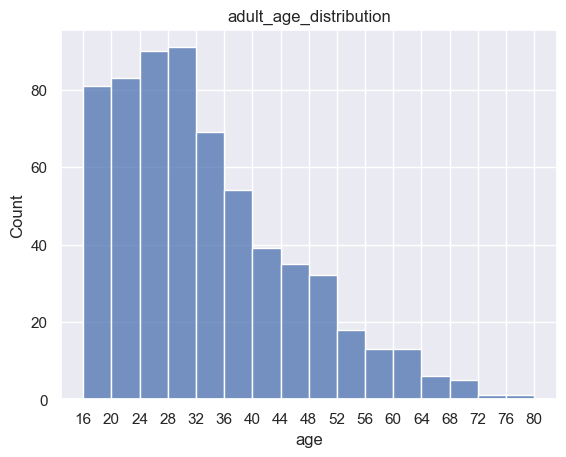

In [55]:
sns.set_theme()
sns.histplot(data=df_adult, x='age', bins=16)
plt.xticks(np.arange(16, 81, 4))
plt.title('adult_age_distribution');

In [55]:
# google colaboratoryの場合
# !pip install japanize-matplotlib

In [56]:
# google colaboratoryの場合
# import japanize_matplotlib
# japanize_matplotlib.japanize()

'age'と'pclass'の関係

In [56]:
df_adult.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who
0,0,3,male,22.0,1,0,7.2500,S,man
1,1,1,female,38.0,1,0,71.2833,C,woman
2,1,3,female,26.0,0,0,7.9250,S,woman
3,1,1,female,35.0,1,0,53.1000,S,woman
4,0,3,male,35.0,0,0,8.0500,S,man


In [57]:
df.groupby('pclass')['fare'].describe()

,count,mean,std,min,25%,50%,75%,max
pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


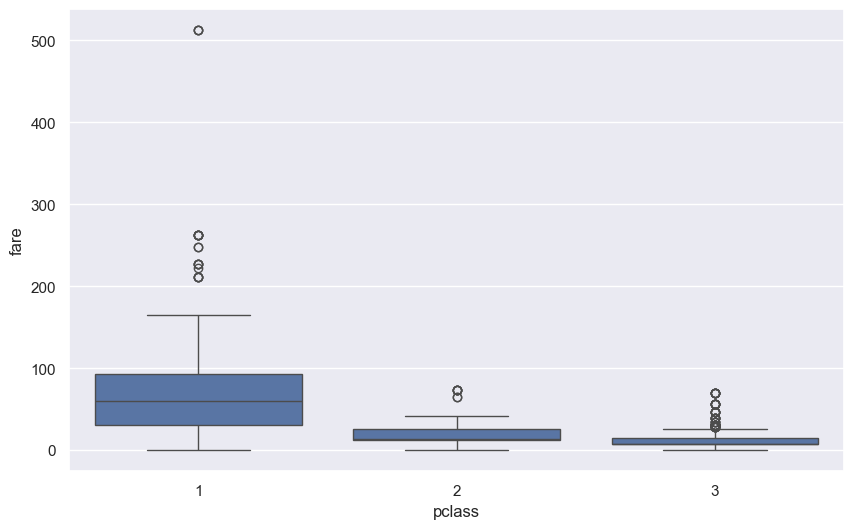

In [58]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='pclass', y='fare');

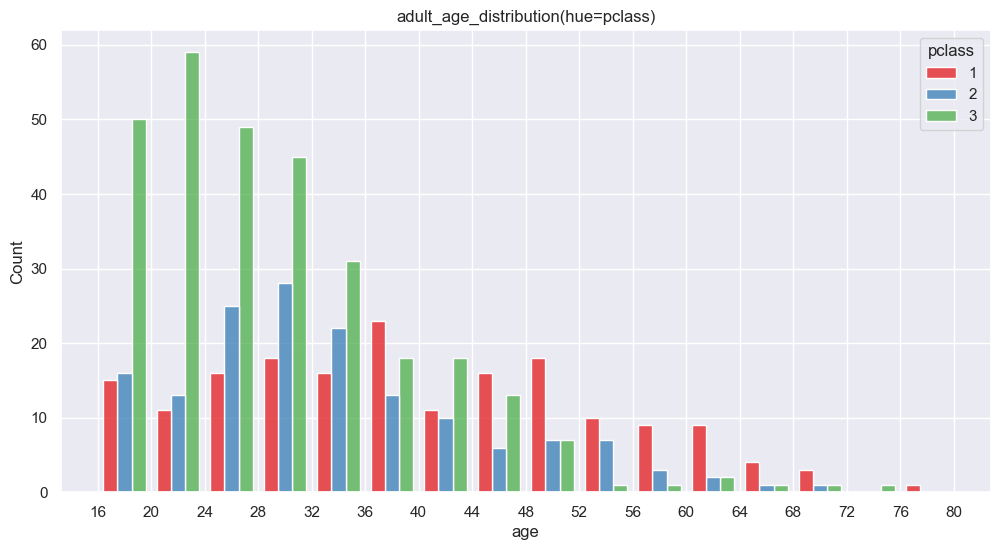

In [59]:
plt.figure(figsize=(12, 6))
sns.set_theme()
sns.histplot(data=df_adult, x='age', bins=16, hue='pclass', palette='Set1', multiple='dodge', shrink=0.8)
plt.xticks(np.arange(16, 81, 4))
plt.title('adult_age_distribution(hue=pclass)');

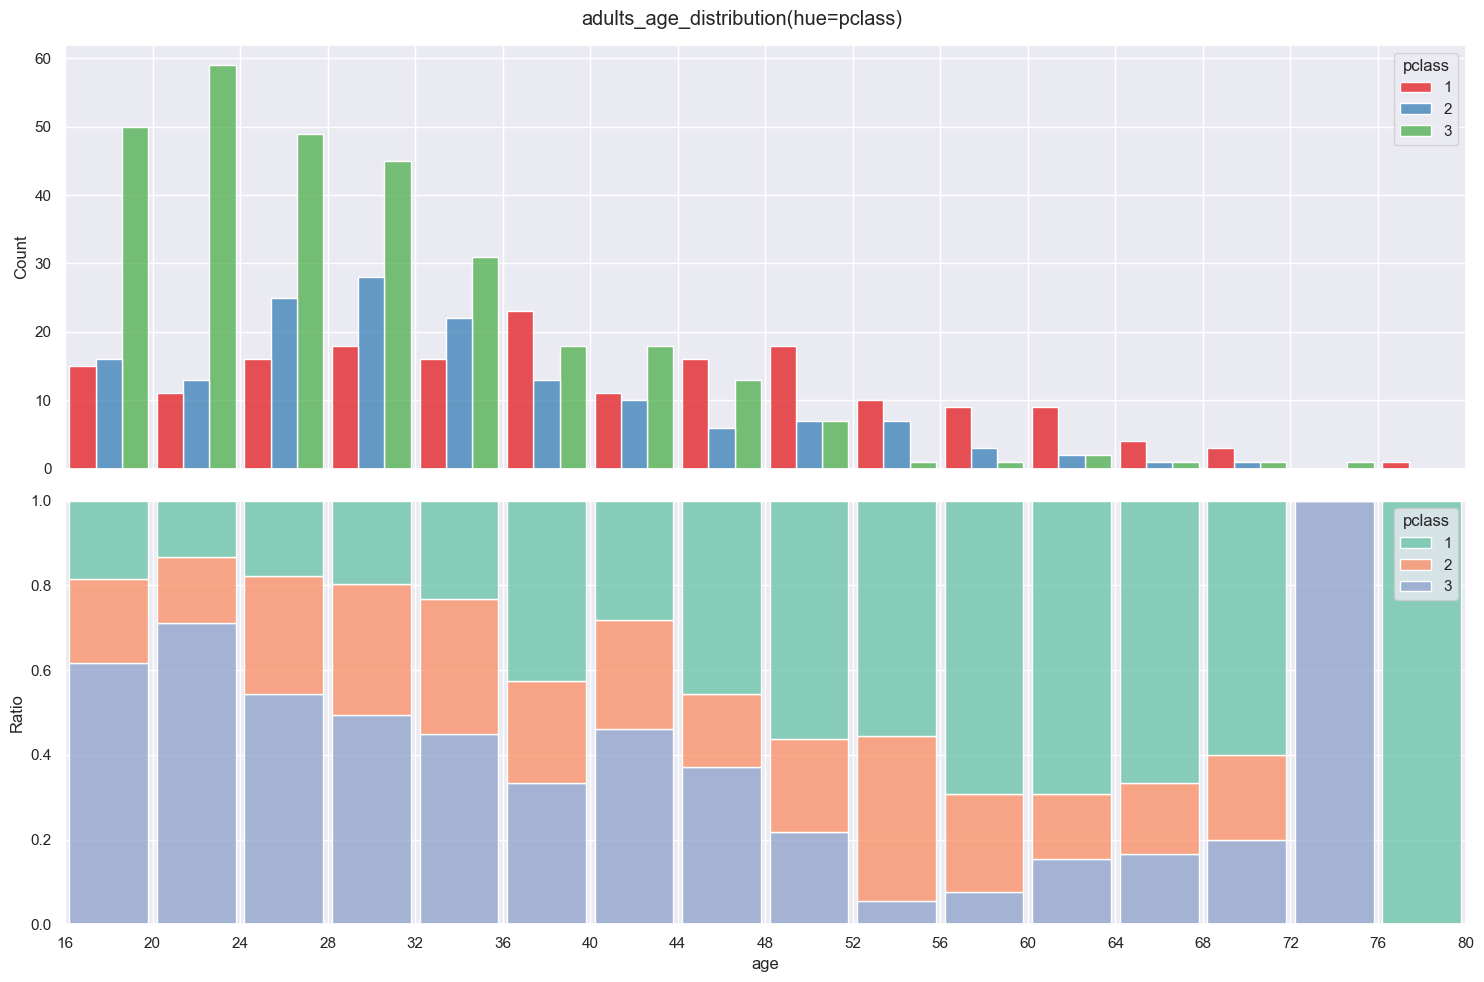

In [60]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10), tight_layout=True, sharex=True)
sns.histplot(data=df_adult, x='age', bins=16, hue='pclass', multiple='dodge', palette='Set1', shrink=0.9, ax=axes[0])
sns.histplot(data=df_adult, x='age', bins=16, hue='pclass', multiple='fill', palette='Set2', shrink=0.9, ax=axes[1])
axes[1].set_ylabel('Ratio')
axes[1].set_xticks(np.arange(16, 81, 4))
axes[0]
fig.suptitle('adults_age_distribution(hue=pclass)')
plt.show()

'age'と'sex'の関係

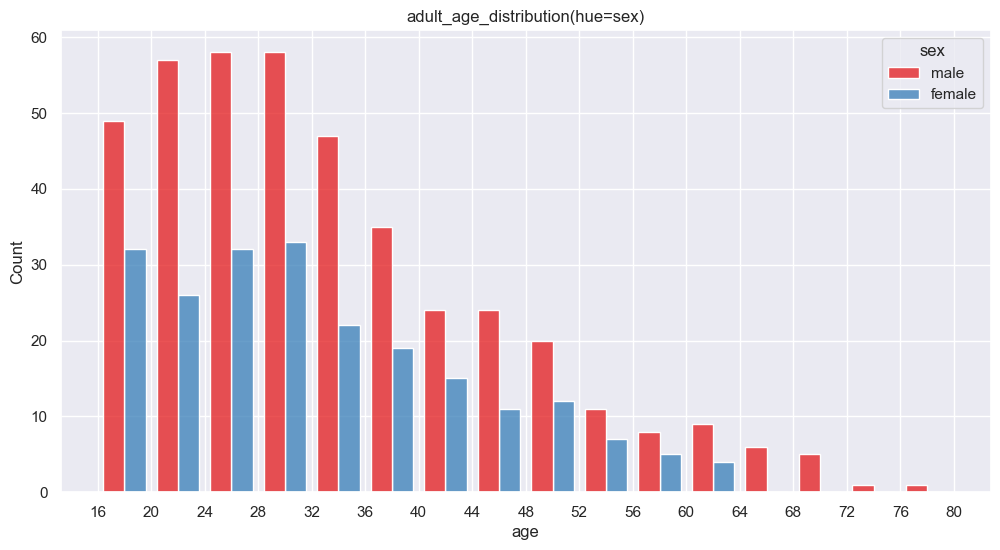

In [61]:
plt.figure(figsize=(12, 6))
sns.set_theme()
sns.histplot(data=df_adult, x='age', bins=16, hue='sex', palette='Set1', multiple='dodge', shrink=0.8)
plt.xticks(np.arange(16, 81, 4))
plt.title('adult_age_distribution(hue=sex)');

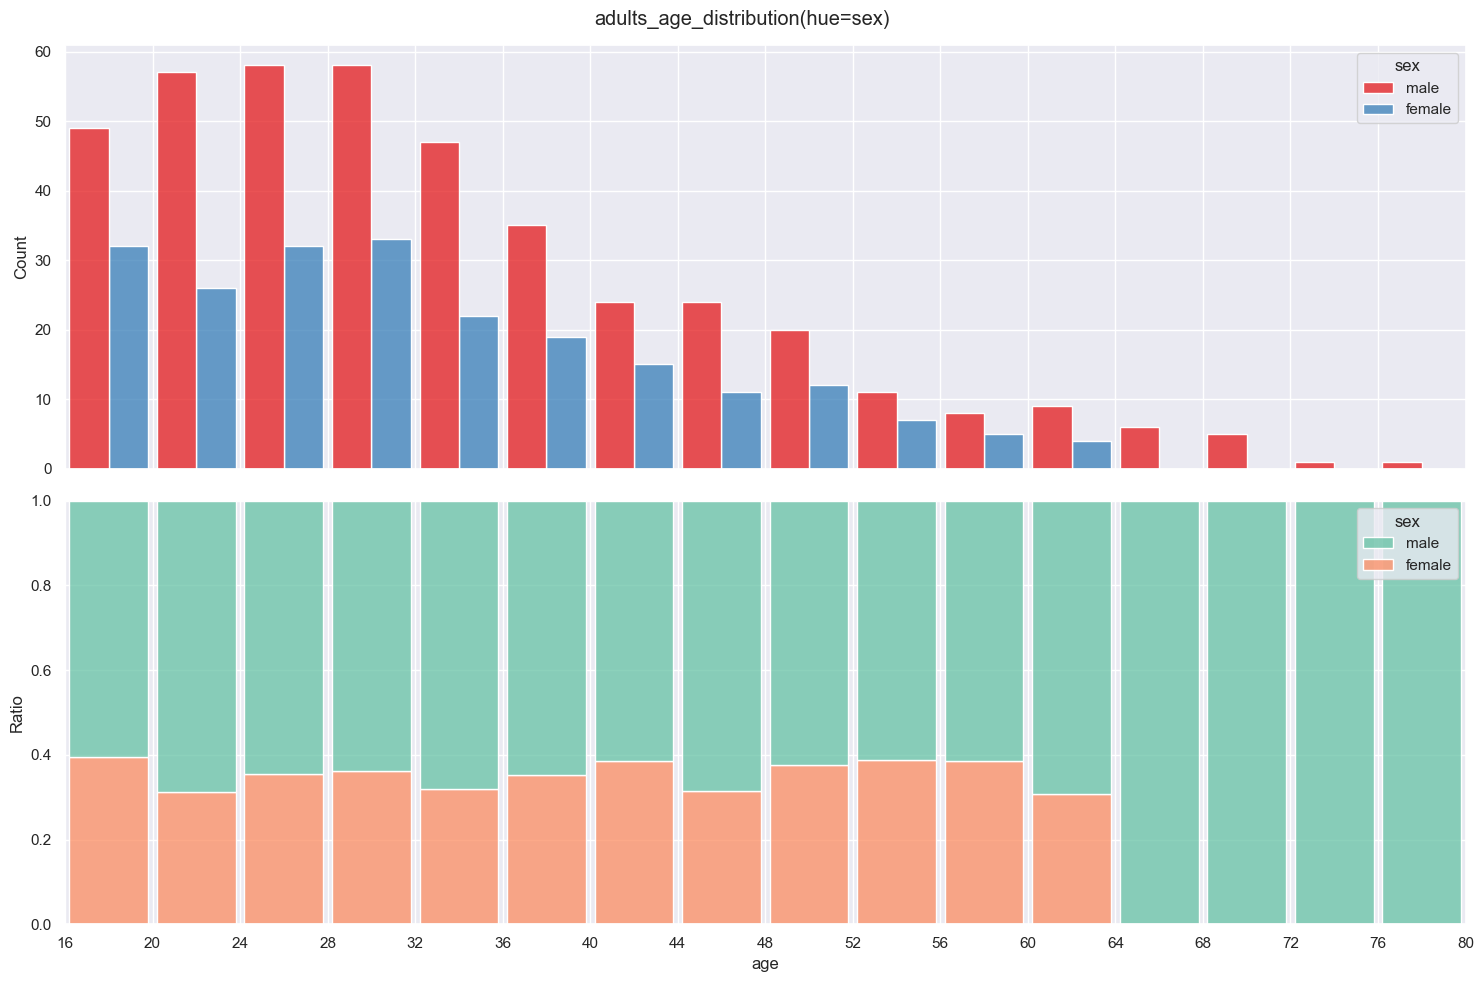

In [83]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10), tight_layout=True, sharex=True)
sns.histplot(data=df_adult, x='age', bins=16, hue='sex', multiple='dodge', palette='Set1', shrink=0.9, ax=axes[0])
sns.histplot(data=df_adult, x='age', bins=16, hue='sex', multiple='fill', palette='Set2', shrink=0.9, ax=axes[1])
axes[1].set_ylabel('Ratio')
axes[1].set_xticks(np.arange(16, 81, 4))
axes[0]
fig.suptitle('adults_age_distribution(hue=sex)')
plt.show()

相関関係

In [85]:
df_adult.corr(numeric_only=True)

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.357681,0.010352,0.011489,0.056731,0.278408
pclass,-0.357681,1.000000,-0.355523,0.003276,-0.015053,-0.547009
age,0.010352,-0.355523,1.000000,-0.050841,0.037404,0.110403
sibsp,0.011489,0.003276,-0.050841,1.000000,0.343077,0.192601
parch,0.056731,-0.015053,0.037404,0.343077,1.000000,0.223638
fare,0.278408,-0.547009,0.110403,0.192601,0.223638,1.000000


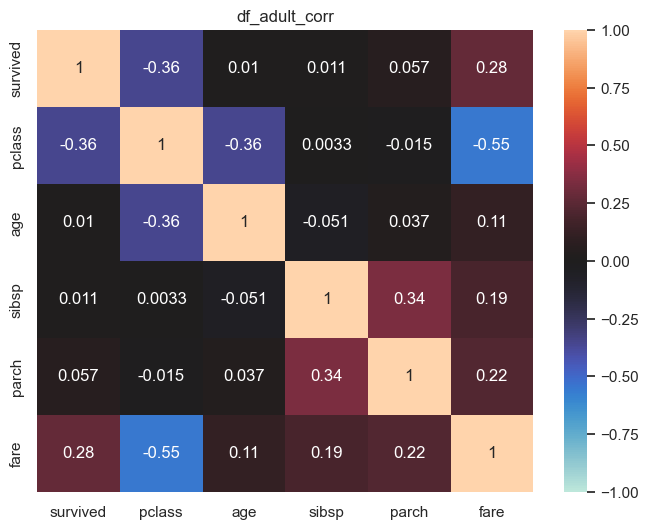

In [90]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_adult.corr(numeric_only=True), annot=True, vmax=1, vmin=-1, center=0)
plt.title('df_adult_corr');

個別の予測は困難であり、Seabornの学習がメインのため、レコードをすべて削除する

In [62]:
df.dropna(axis=0, inplace=True)

In [63]:
df.shape

(714, 9)

CSVファイルとして保存する

In [64]:
df.to_csv('titanic_non_null.csv', index=False)

---
<a id=4></a>
[Topへ](#0)

---
## 4. カテゴリカルプロット

* キャットプロットとストリッププロット
 * **sns.catplot()**
    <p>
        <a href="https://seaborn.pydata.org/generated/seaborn.catplot.html" target="_blank" rel="noreferrer noopener">
            Seaborn.catplot のページへ
        </a>
    </p>
    

* カウントプロット
    * **sns.countplot()**
    <p>
        <a href="https://seaborn.pydata.org/generated/seaborn.countplot.html" target="_blank" rel="noreferrer noopener">
            Seaborn.countplot のページへ
        </a>
    </p>


* バープロット
 * **sns.barplot()**
    <p>
        <a href="https://seaborn.pydata.org/generated/seaborn.barplot.html" target="_blank" rel="noreferrer noopener">
            Seaborn.barplot のページへ
        </a>
    </p>


* ボックスプロット
 * **sns.boxplot()**
    <p>
        <a href="https://seaborn.pydata.org/generated/seaborn.boxplot.html" target="_blank" rel="noreferrer noopener">
            Seaborn.boxplot のページへ
        </a>
    </p>
    

* バイオリンプロット
 * **sns.violinplot()**
    <p>
        <a href="https://seaborn.pydata.org/generated/seaborn.violinplot.html" target="_blank" rel="noreferrer noopener">
            Seaborn.violinplot のページへ
        </a>
    </p>
    
    
* スウォームプロット
 * **sns.swarmplot()**
    <p>
        <a href="https://seaborn.pydata.org/generated/seaborn.swarmplot.html" target="_blank" rel="noreferrer noopener">
            Seaborn.swarmplot のページへ
        </a>
    </p>
    


---

キャットプロットとストリッププロット

In [65]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who
0,0,3,male,22.0,1,0,7.2500,S,man
1,1,1,female,38.0,1,0,71.2833,C,woman
2,1,3,female,26.0,0,0,7.9250,S,woman
3,1,1,female,35.0,1,0,53.1000,S,woman
4,0,3,male,35.0,0,0,8.0500,S,man


In [66]:
df.groupby('embarked')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
embarked,,,,,,,,
C,132.0,31.105455,15.566968,0.42,21.75,29.0,40.0,71.0
Q,28.0,28.089286,16.915396,2.00,17.50,27.0,34.5,70.5
S,554.0,29.445397,14.143192,0.67,21.00,28.0,38.0,80.0


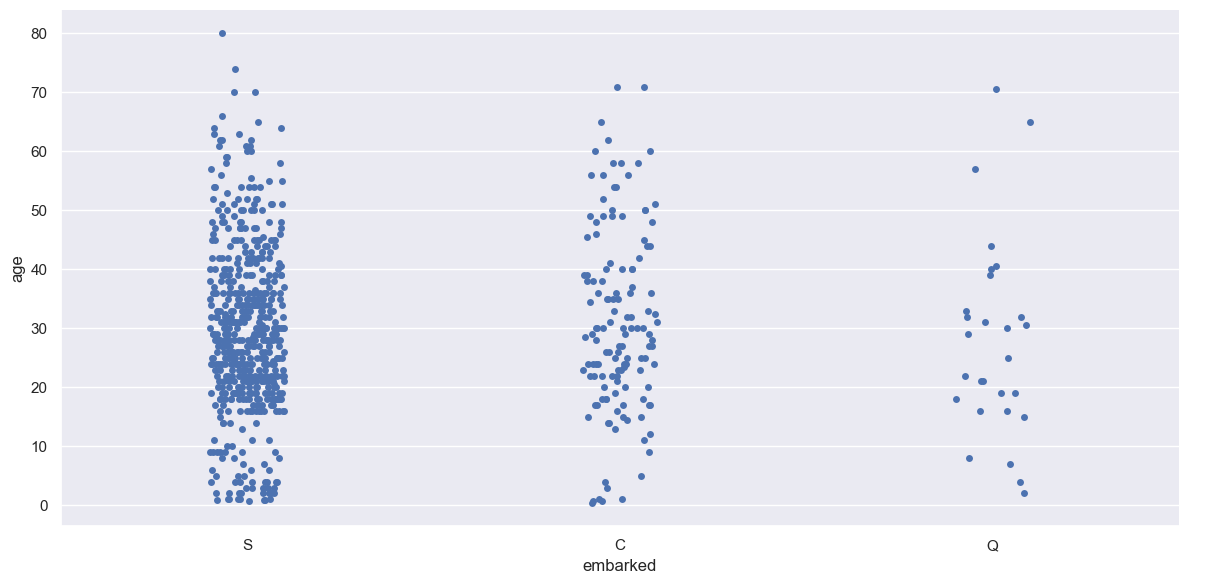

In [67]:
sns.catplot(data=df, x='embarked', y='age', height=6, aspect=2);

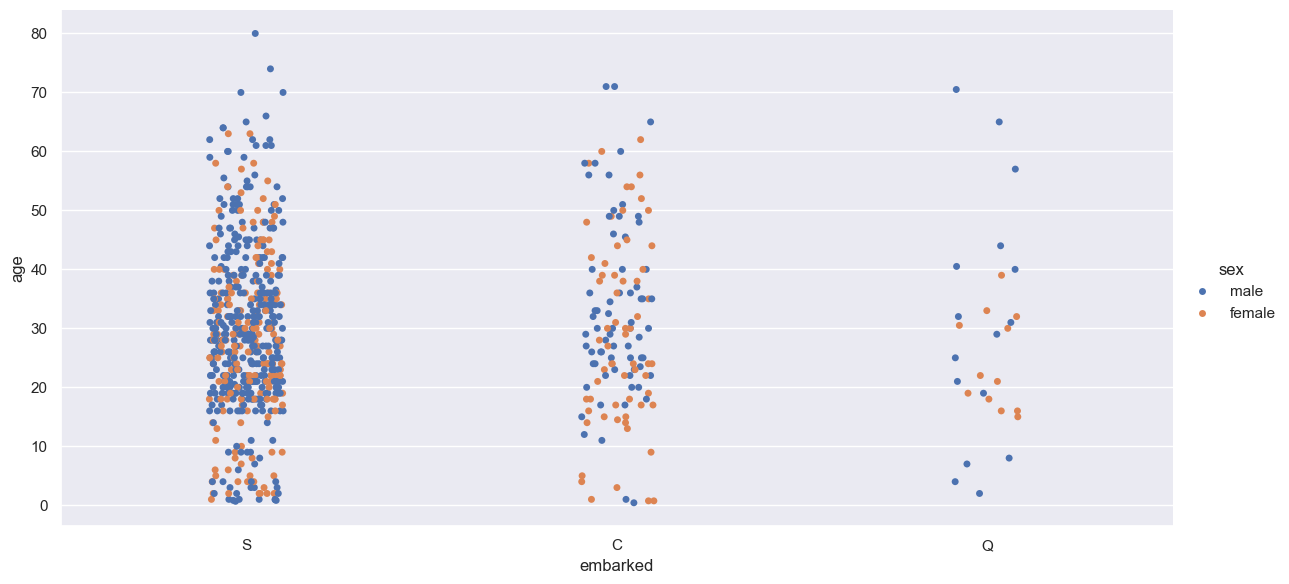

In [68]:
sns.catplot(data=df, x='embarked', y='age', hue='sex', height=6, aspect=2);

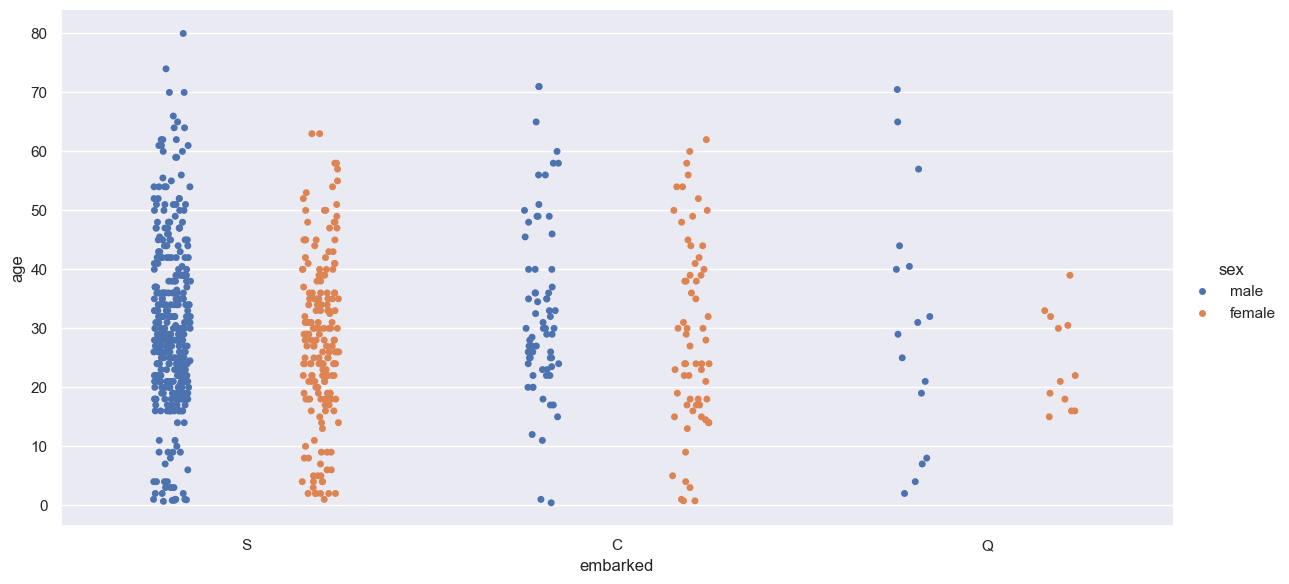

In [69]:
sns.catplot(data=df, x='embarked', y='age', hue='sex', dodge=True, height=6, aspect=2);

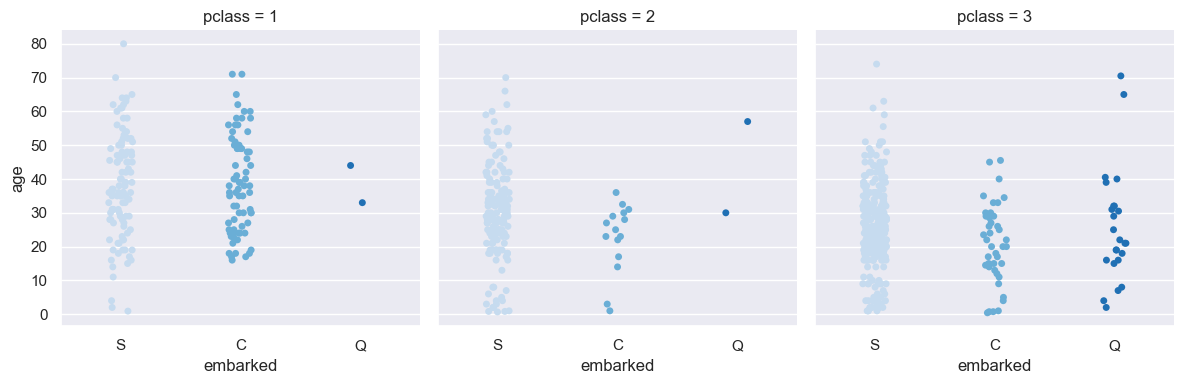

In [70]:
sns.catplot(data=df, x='embarked', y='age', height=4, col='pclass', palette='Blues');

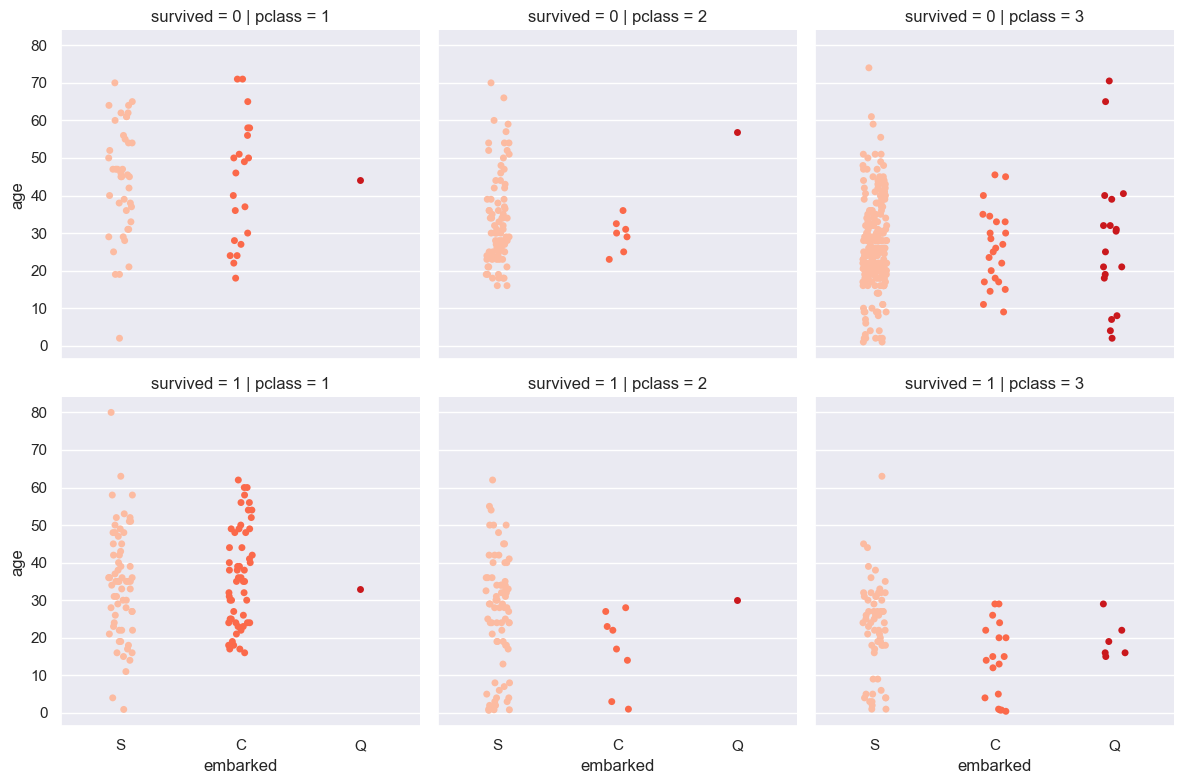

In [71]:
sns.catplot(data=df, x='embarked', y='age', height=4, col='pclass', row='survived', palette='Reds');

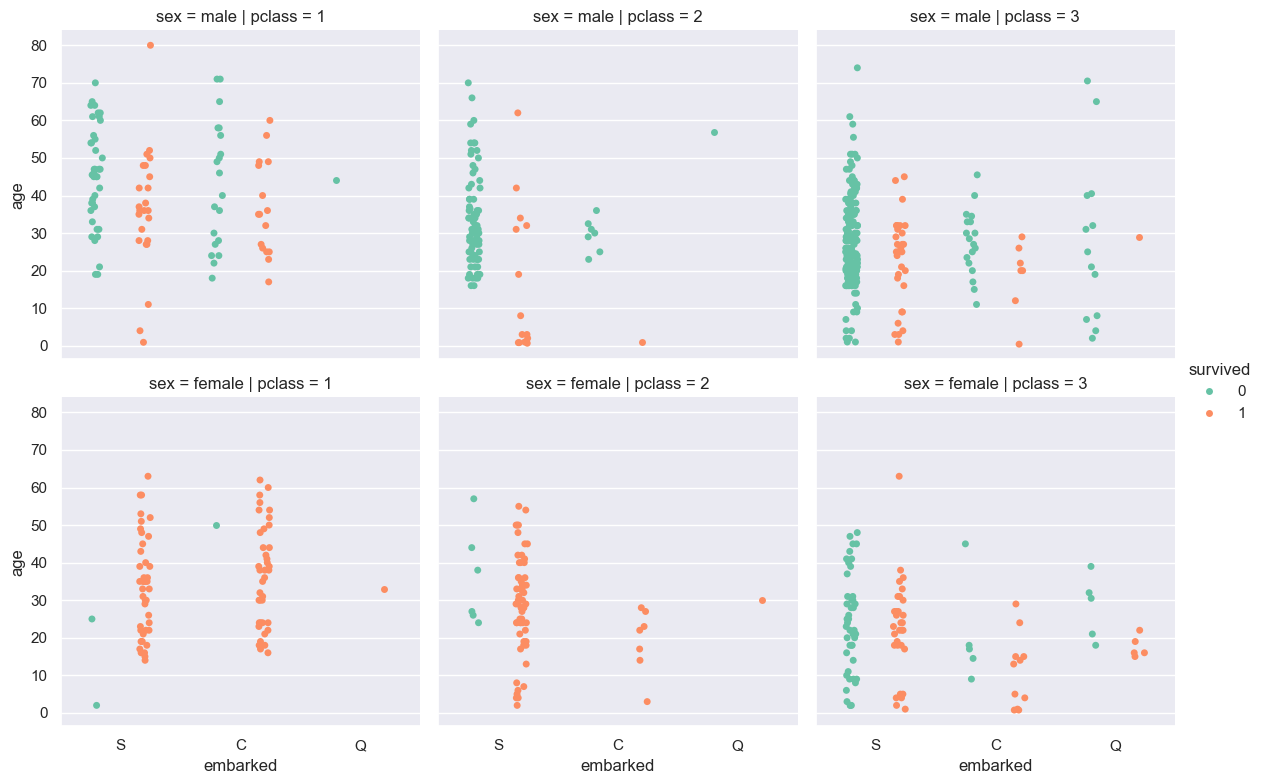

In [72]:
sns.catplot(data=df, x='embarked', y='age', height=4, col='pclass', row='sex', hue='survived', palette='Set2', dodge=True);

カウントプロット

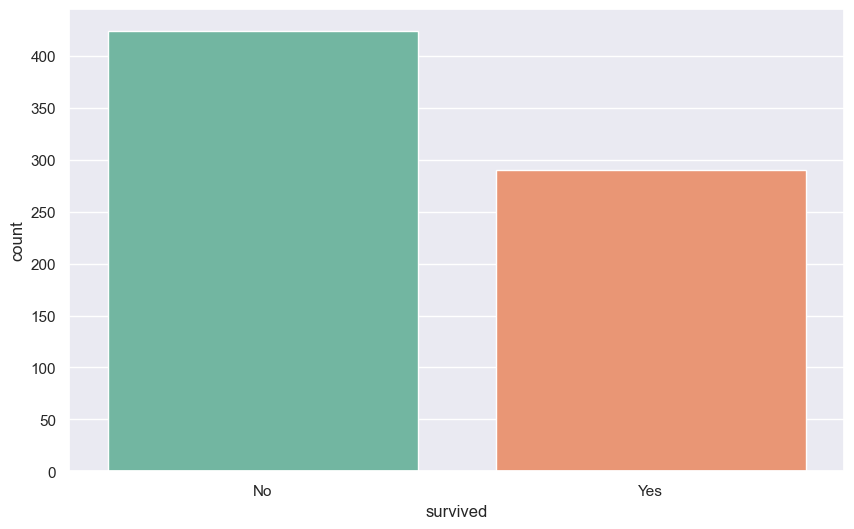

In [73]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='survived', palette='Set2')
plt.xticks([0, 1], ['No', 'Yes']);

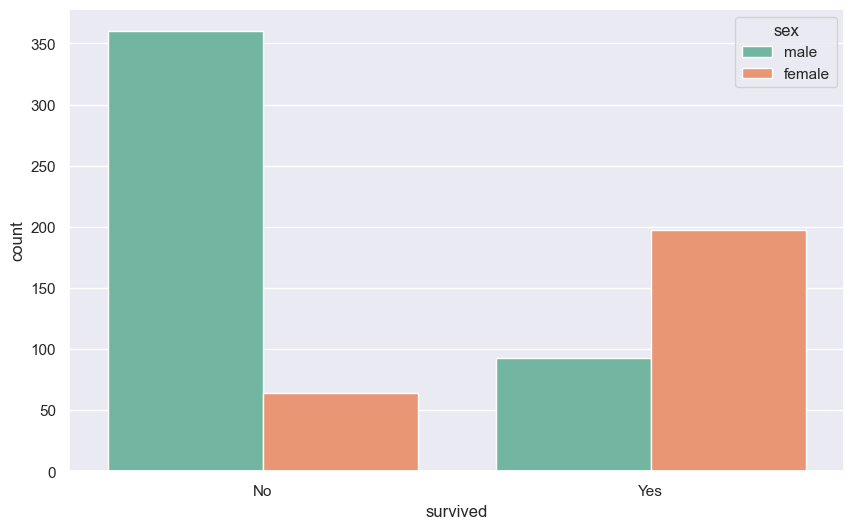

In [74]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='survived', hue='sex', palette='Set2')
plt.xticks([0, 1], ['No', 'Yes']);

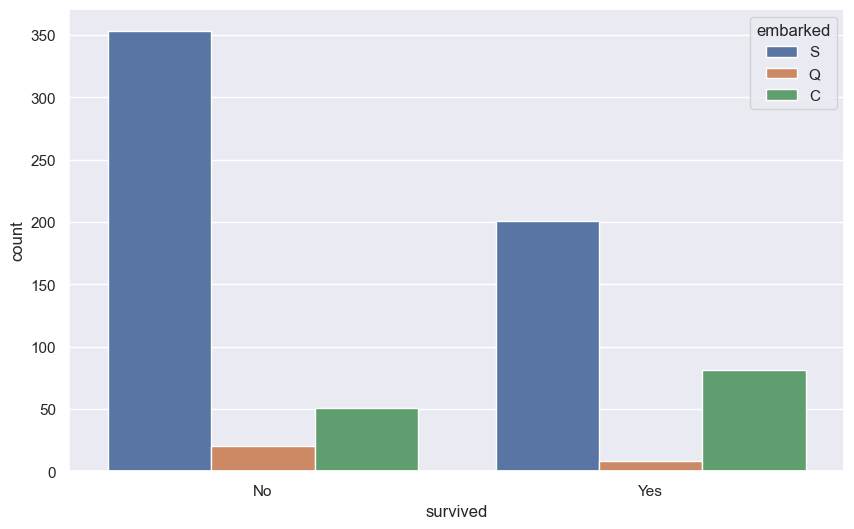

In [75]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='survived', hue='embarked')
plt.xticks([0, 1], ['No', 'Yes']);

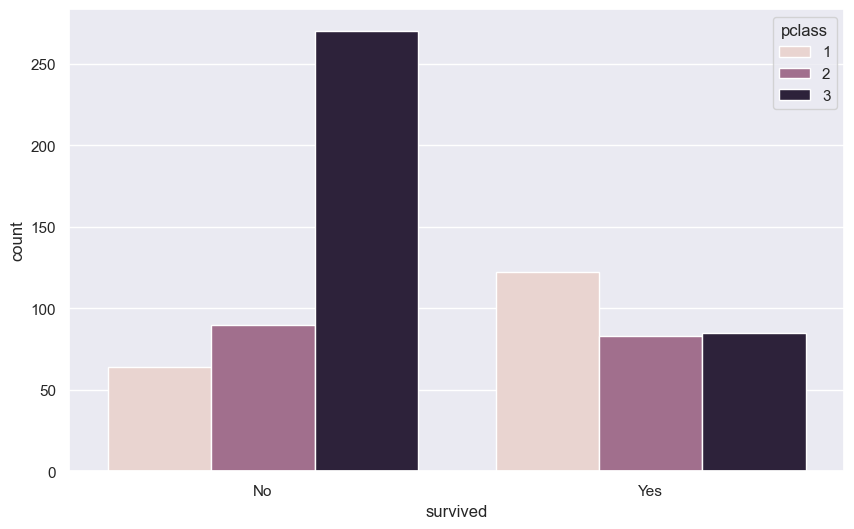

In [76]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='survived', hue='pclass')
plt.xticks([0, 1], ['No', 'Yes']);

バープロット

    embarked : Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton  

['Cherbourg', 'Queenstown', 'Southampton']

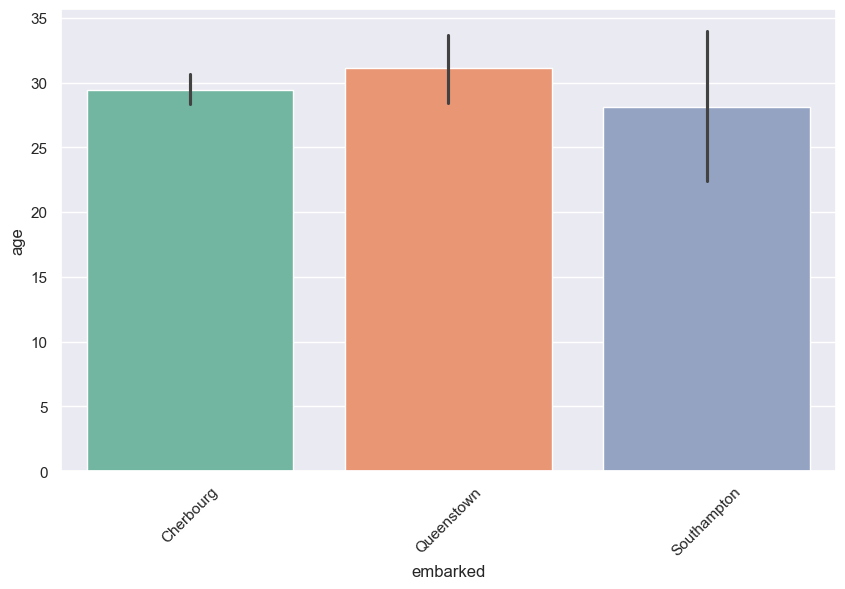

In [77]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='embarked', y='age', palette='Set2')
plt.xticks([0, 1, 2], ['Cherbourg', 'Queenstown', 'Southampton'], rotation=45);

In [78]:
df.groupby('embarked')['age'].mean()

embarked
C    31.105455
Q    28.089286
S    29.445397
Name: age, dtype: float64

ボックスプロット

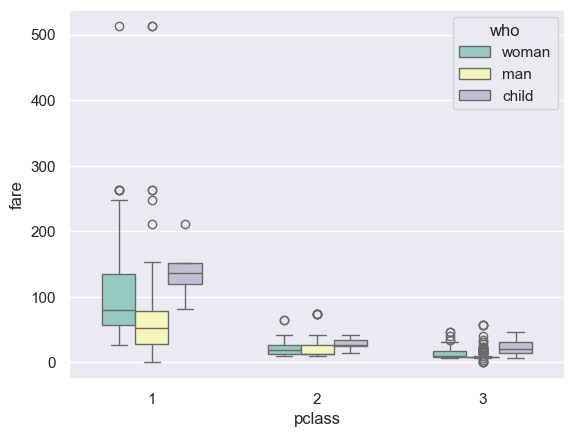

In [79]:
sns.boxplot(data=df, x='pclass', y='fare', hue='who', palette='Set3', width=0.6);

In [80]:
df.groupby(['pclass', 'who'])['fare'].describe()

count        mean        std      min         25%        50%  \
pclass who                                                                   
1      child    6.0  139.382633  43.666954  81.8583  120.000000  135.77500   
       man     98.0   69.714414  81.084213   0.0000   28.800000   51.93125   
       woman   82.0  106.006657  77.542322  25.9292   57.244800   80.00000   
2      child   19.0   28.323905   7.750054  14.5000   24.500000   26.25000   
       man     90.0   20.493842  15.059067  10.5000   12.612500   13.00000   
       woman   64.0   20.812175  11.013748  10.5000   13.000000   19.12500   
3      child   58.0   23.220190  11.365095   7.2250   13.676075   21.07500   
       man    225.0   10.227127   7.927257   0.0000    7.750000    7.89580   
       woman   72.0   14.563542   9.436050   6.7500    7.872950    9.83960   

                   75%       max  
pclass who                        
1      child  151.5500  211.3375  
       man     79.1125  512.3292  
       woman  134.5000  512.3292  
2      child   34.8750   41.5792  
       man     26.0000   73.5000  
       woman   26.0000   65.0000  
3      child   31.2750   46.9000  
       man      8.6625   56.4958  
       woman   17.5000   46.9000

バイオリンプロット

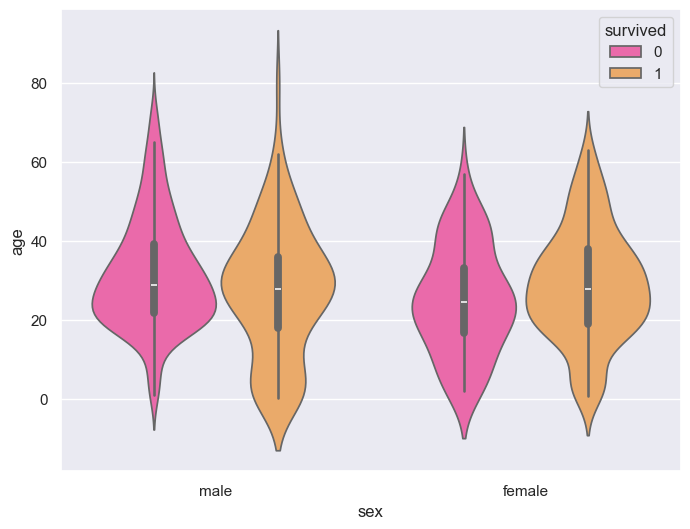

In [81]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='sex', y='age', hue='survived', palette='spring');

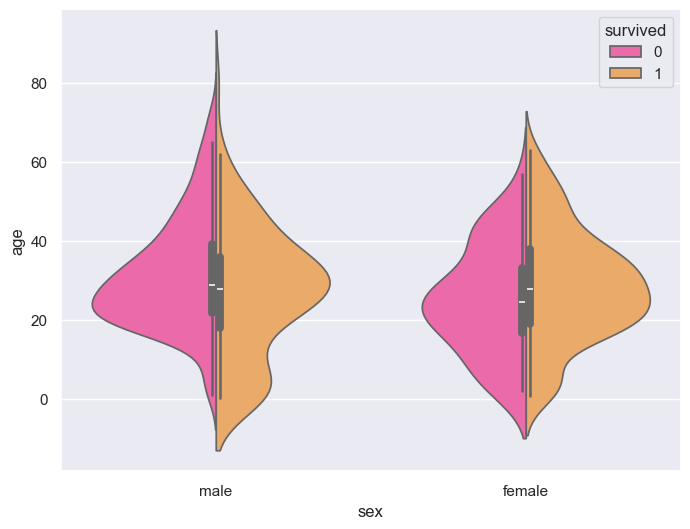

In [82]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='sex', y='age', hue='survived', palette='spring', split=True);

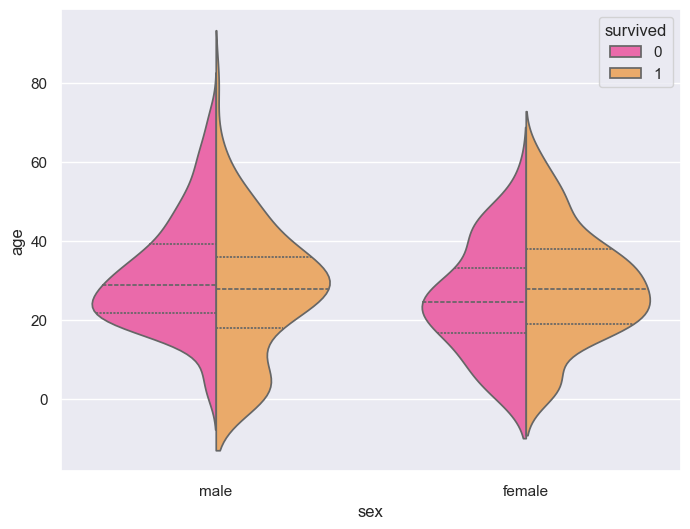

In [83]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='sex', y='age', hue='survived', palette='spring', split=True, inner='quartile');

スウォームプロット

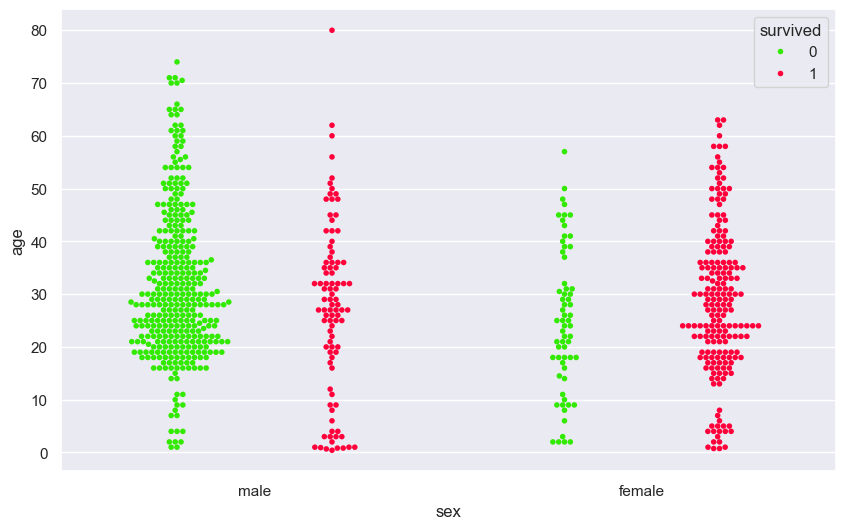

In [84]:
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df, x='sex', y='age', hue='survived', palette='prism', dodge=True, size=4);

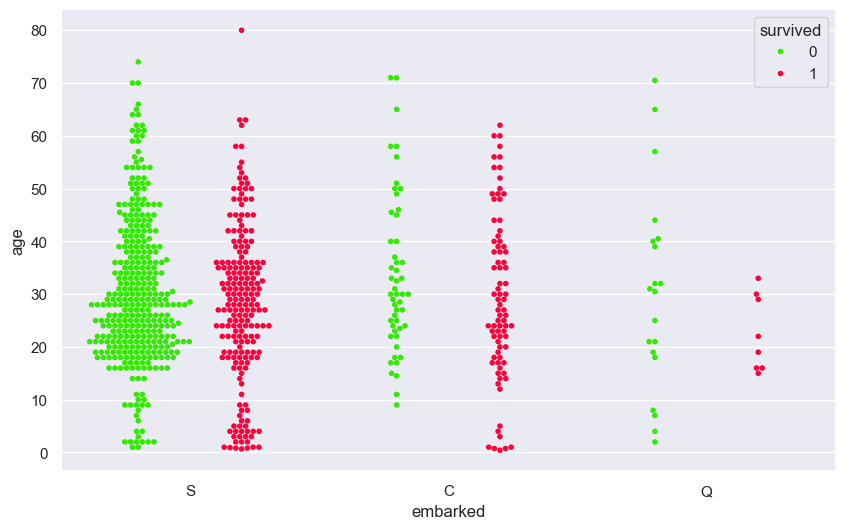

In [85]:
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df, x='embarked', y='age', hue='survived', palette='prism', dodge=True, size=4);

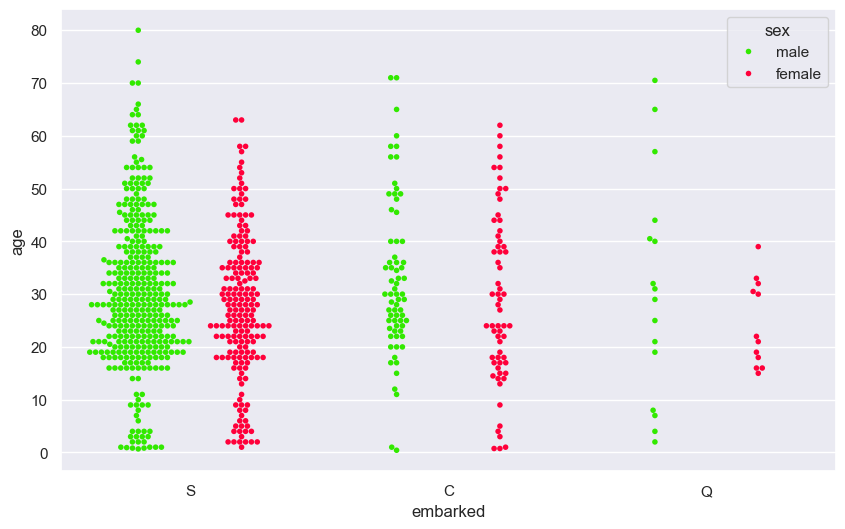

In [86]:
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df, x='embarked', y='age', hue='sex', palette='prism', dodge=True, size=4);

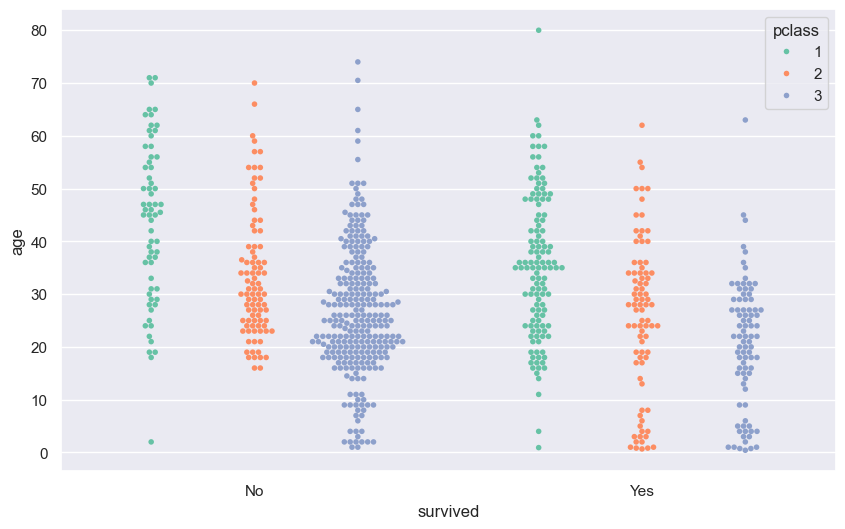

In [87]:
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df, x='survived', y='age', hue='pclass', palette='Set2', dodge=True, size=4)
plt.xticks([0, 1], ['No', 'Yes']);

---
 <a id=4></a>
[Topへ](#0)

---
## 以上
    
---